# Исследование объявлений о продаже квартир

Мы можем рассмотреть данные сервиса Яндекс.Недвижимость - архив объявлений о продаже квартир за несколько лет в Санкт-Петербурге и соседних населённых пунктах. Мы определим рыночную стоимость объектов недвижимости. Проведем анализ для дальнейшего построения автоматизированной системы, которая поможет выявить мошенническую деятельность .

В датасете есть два типа данных - вписанные пользователями и записанные системой автоматически. Мы проанализируем оба типа.

## Описание данных
airports_nearest — расстояние до ближайшего аэропорта в метрах (м);

balcony — число балконов;

ceiling_height — высота потолков (м);

cityCenters_nearest — расстояние до центра города (м);

days_exposition — сколько дней было размещено объявление (от публикации до снятия);

first_day_exposition — дата публикации;

floor — этаж;

floors_total — всего этажей в доме;

is_apartment — апартаменты (булев тип);

kitchen_area — площадь кухни в квадратных метрах (м²);

last_price — цена на момент снятия с публикации;

living_area — жилая площадь в квадратных метрах (м²);

locality_name — название населённого пункта;

open_plan — свободная планировка (булев тип);

parks_around3000 — число парков в радиусе 3 км;

parks_nearest — расстояние до ближайшего парка (м);

ponds_around3000 — число водоёмов в радиусе 3 км;

ponds_nearest — расстояние до ближайшего водоёма (м);

rooms — число комнат;

studio — квартира-студия (булев тип);

total_area — общая площадь квартиры в квадратных метрах (м²);

total_images — число фотографий квартиры в объявлении;


## Цели исследования:
Обнаружить аномалии ;

Выявить каких аномалий больше всего;

На основе исследования подумать о системе которая поможет избежать аномалий в будущем;

Изучить разнородные факторы , которые влияют на стоимость квартир;


## Задачи исследования:
-Получить основную информацию о данных;

-Отобразить количественный показатель пропусков;

-Изучить выбивающиеся значения для дальнейшего анализа;

-Переименовать столбцы;

-Найти и изучить пропущенные значения в столбцах;

-Рассмотреть типы данных в каждом столбце;

-Изучить уникальные значения в столбце с названиями и устранить неявные дубликаты;

-Найти и устранить редкие и выбивающиеся значения;

-Добавить цену одного квадратного метра;

-Посчитать и добавить в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.);

-Посчитать и добавить в таблицу: месяц публикации объявления;

-Посчитать и добавить в таблицу: год публикации объявления;

-Посчитать и добавить в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»);

-Посчитать и добавить в таблицу: расстояние в километрах до центра города;

-Изучить общую площадь квартир;

-Изучить жилую площадь квартир;

-Изучить кухни;

-Изучить стоимость квартиры;

-Изучить количество комнат;

-Изучить высоту потолков;

-Изучить этаж;

-Изучить тип этажа квартиры;

-Изучить количество этажей;

-Изучить расстояние до центра города в метрах;

-Изучить расстояние до близжайших аэропортов;

-Изучить расстояние до близжайших парков;

-Рассмотреть день и месяц побликации объявления;

-Достроить гистограммы для столбца total_images;

-Достроить гистограммы для столбца first_day_exposition;

-Достроить гистограммы для столбца balcony;

-Достроить гистограммы для столбца parks_around;

-Достроить гистограммы для столбца ponds_around;

-Достроить гистограммы для столбца ponds_nearest;

-Достроить гистограммы для столбца price_per_square_meter;

-Изучить, как быстро или как долго продавались квартиры;

-Выяснить насколько фактор общей площади повлиял на стоимость квартир;

-Выяснить насколько фактор жилой площади повлиял на стоимость квартир;

-Выяснить насколько фактор кухонной площади повлиял на стоимость квартир;

-Выяснить насколько фактор количества комнат повлиял на стоимость квартир;

-Выяснить насколько фактор категории этажей повлиял на стоимость квартир;

-Узнать насколько фактор даты публикации повлиял на стоимость квартир;

-Выяснить среднюю стоимость квадратных метров у 10 населенных пунктов с самым высоким количеством объявлений. Визуализировать находку;

-Выяснить среднюю стоимость квадратного километра в зависимости от отдаленного квартиры от центра города;

-Изучить общую площадь квартир;

### Откройте файл с данными и изучите общую информацию. 

Подключить библиотеки.

In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np

Получить основную информацию о данных.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


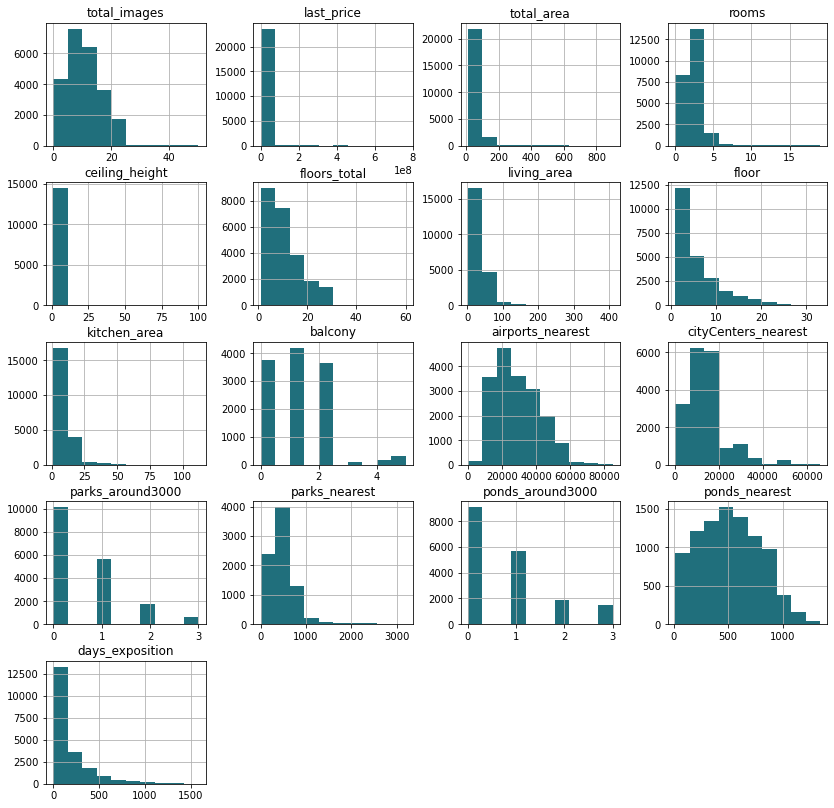

In [2]:
data = pd.read_csv('real_estate_data',sep='\t')
data.info()
data.hist(figsize = (14,14), color = '#206F7C')
display(data.head())

Отобразить количественный показатель пропусков .

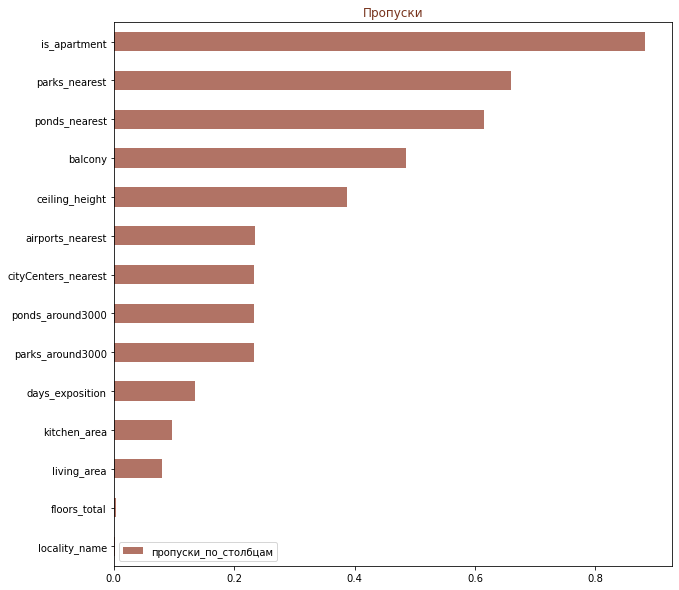

In [3]:
def pass_value_barh(df):
    (
        data.isna().mean())\
        .to_frame()\
        .rename(columns = {0:'пропуски_по_столбцам'})\
        .query('пропуски_по_столбцам > 0')\
        .sort_values(by = 'пропуски_по_столбцам',ascending = True)\
        .plot(kind = 'barh',color = '#B17365', figsize = (10,10))\
        .set_title('Пропуски',color = '#77341D'\
        
    );
pass_value_barh(data)


Изучить выбивающиеся значения для дальнейшего анализа.

In [4]:
data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', \
      'last_price', 'living_area',  'kitchen_area', 'floor',
       'floors_total']]\
    .apply (['count', 'min', 'max'])\
    .style.format("{:,.2f}")


,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"23,699.00","23,699.00","14,504.00","20,518.00","23,699.00","21,796.00","21,421.00","23,699.00","23,613.00"
min,0.00,12.00,1.00,1.00,"12,190.00",2.00,1.30,1.00,1.00
max,19.00,900.00,100.00,"1,580.00","763,000,000.00",409.70,112.00,33.00,60.00


### Предобработка данных

Переименовать столбцы.

In [5]:
data.rename(columns = {'cityCenters_nearest': 'city_centers_nearest','ponds_around3000':'ponds_around',
'parks_around3000':'parks_around'},inplace = True)
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Найти и изучить пропущенные значения в столбцах.

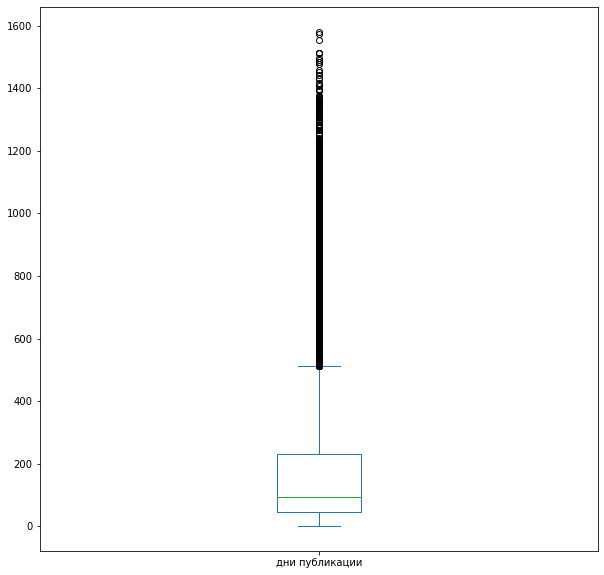

In [6]:
data['is_apartment'] = data['is_apartment'].fillna(False)
park_mean = data['parks_nearest'].mean()
data['parks_nearest'] = data['parks_nearest'].fillna(park_mean)
ceiling_height_median = data['ceiling_height'].median()
data['ceiling_height'] = data['ceiling_height'].fillna(ceiling_height_median)
floors_total_mean = data['floors_total'].mean()
data['balcony'] = data['balcony'].fillna(0)
data['floors_total'] = data['floors_total'].fillna(floors_total_mean)
airoports_nerest_mean = data['airports_nearest'].mean()
data['airports_nearest'] = data['airports_nearest'].fillna(airoports_nerest_mean)
city_centers_nearest_mean = data['city_centers_nearest'].mean()
data['city_centers_nearest'] = data['city_centers_nearest'].fillna(city_centers_nearest_mean)
parks_around_mean = data['parks_around'].mean()
data['parks_around'] = data['parks_around'].fillna(parks_around_mean)
ponds_around_mean = data['ponds_around'].mean()
data['ponds_around'] = data['ponds_around'].fillna(ponds_around_mean)
ponds_nearest_mean = data['ponds_nearest'].mean()
data['ponds_nearest'] = data['ponds_nearest'].fillna(ponds_nearest_mean)
data['days_exposition'].plot(kind = "box", figsize = (10,10),label = 'дни публикации' )

day_exposition_srez = data[(data['days_exposition'] > 0) & (data['days_exposition'] < 200)]
day_exposition_mean = day_exposition_srez['days_exposition'].mean()
data['days_exposition'] = data['days_exposition'].fillna(day_exposition_mean)

Установка аномалии:Q3 отличается от медианы на 60 процентов, это не так много.
Мы сбросили данные до 1200 и ниже, и мы получим различие в 33 процента, и потеряли  100 записей.

Рассмотреть  типы данных в каждом столбце.

In [7]:
data['parks_nearest'] = data['parks_nearest'].astype('int64')
data['floors_total'] = data['floors_total'].astype('int64')
data['balcony'] = data['balcony'].astype('int64')
data['airports_nearest'] = data['airports_nearest'].astype('int64')
data['city_centers_nearest'] = data['city_centers_nearest'].astype('int64')
data['parks_around'] = data['parks_around'].astype('int64')
data['ponds_around'] = data['ponds_around'].astype('int64')
data['ponds_nearest'] = data['ponds_nearest'].astype('int64')
data['last_price'] = data['last_price'].astype('int64')
data['total_area'] = data['total_area'].astype('int64')
data['days_exposition'] = data['days_exposition'].astype('int64')


Изучить уникальные значения в столбце с названиями и устранить неявные дубликаты.

In [8]:
data['locality_name'] = data['locality_name'].\
replace('поселок Пансионат Зелёный Бор','посёлок Пансионат Зелёный Бор')

data['locality_name'] = data['locality_name'].\
replace('поселок Мурино','посёлок Мурино')

data['locality_name'] = data['locality_name'].\
replace('поселок Мичуринское','посёлок Мичуринское')

data['locality_name'] = data['locality_name'].\
replace('поселок Бугры','посёлок Бугры')

data['locality_name'] = data['locality_name'].\
replace('городской поселок Янино-1','городской посёлок Янино-1')

Найти и устранить редкие и выбивающиеся значения. 

In [9]:
data = data[(data['last_price'] > 12190.0) & (data['last_price'] < 401300000.0) | (data['last_price'].isna())]
data = data[(data['floors_total'] >= data['floor']) | (data['floors_total'].isna())]
data = data.dropna(subset = ['locality_name'])
data = data.loc[(data['ceiling_height'] <= 5) & (data['ceiling_height'] >= 2) | (data['ceiling_height'].isna())]
data = data.loc[(data['rooms'] < 9) | (data['rooms'].isna())]
data = data.loc[(data['living_area'] > 3) & (data['living_area'] != 300) | (data['living_area'].isna())]
data = data.loc[(data['kitchen_area'] > 3) & (data['kitchen_area'] < 87) | (data['kitchen_area'].isna())]
data = data[(data['total_area'] * 0.9 > (data['living_area'] + data['kitchen_area'])) | (data['total_area'].isna()) |
(data['living_area']
.isna()) | (data['kitchen_area'].isna())]
data = data.loc[(data['floors_total'] != 60)
               & (data['floors_total'] != 29) & (data['floors_total'] != 33) & (data['floors_total'] != 52)]
data = data.loc[(data['total_area'] >= 20) & (data['total_area'] <= 450) | (data['total_area'].isna())]
data = data.loc[data['last_price'] != 12190]

data = data.loc[(data['floor'] < 27) | (data['floor'].isna())]

data = data.loc[data['days_exposition'] < 1200]

data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition
0,20,13000000,108,2019-03-07T00:00:00,3,2.70,16,51.0,8,False,...,25.00,0,Санкт-Петербург,18863,16028,1,482,2,755,72
1,7,3350000,40,2018-12-04T00:00:00,1,2.65,11,18.6,1,False,...,11.00,2,посёлок Шушары,12817,18603,0,490,0,517,81
2,10,5196000,56,2015-08-20T00:00:00,2,2.65,5,34.3,4,False,...,8.30,0,Санкт-Петербург,21741,13933,1,90,2,574,558
3,0,64900000,159,2015-07-24T00:00:00,3,2.65,14,NaN,9,False,...,NaN,0,Санкт-Петербург,28098,6800,2,84,3,234,424
4,2,10000000,100,2018-06-19T00:00:00,2,3.03,14,32.0,13,False,...,41.00,0,Санкт-Петербург,31856,8098,2,112,1,48,121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133,2017-03-21T00:00:00,3,3.70,5,73.3,3,False,...,13.83,0,Санкт-Петербург,24665,4232,1,796,3,381,72
23695,14,3100000,59,2018-01-15T00:00:00,3,2.65,5,38.0,4,False,...,8.50,0,Тосно,28793,14191,0,490,0,517,45
23696,18,2500000,56,2018-02-11T00:00:00,2,2.65,3,29.7,1,False,...,NaN,0,село Рождествено,28793,14191,0,490,0,517,72
23697,13,11475000,76,2017-03-28T00:00:00,2,3.00,17,NaN,12,False,...,23.30,2,Санкт-Петербург,39140,10364,2,173,3,196,602


Для дней публикации сбрасываем данные от 1200 потому что разница в 400 и уменьшенный на 27%разрыв, выглядят лучше , чем  1600 записей и 60% разрыв(60/1600>33/1200).

Итоговая потеря данных составила 3.5 процента.

### Посчитать и добавить в таблицу новые столбцы

In [10]:
data['price_per_square_meter'] = data['last_price'] / data['total_area']

Добавить цену одного квадратного метра.

Посчитать и добавить в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)

In [11]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')

data['weekday_exposition'] = data['first_day_exposition'].dt.weekday
 
data = data.replace({'weekday_exposition':{0:'понедельник', 1:'вторник',2:'среда',3:'четверг',4:'пятница',
5:'суббота',6:'воскресенье'}})

Посчитать и добавить в таблицу: месяц публикации объявления.

In [12]:
data['month_exposition'] = data['first_day_exposition'].dt.month
data = data.replace({'month_exposition' : {1 : 'февраль', 2 : 'март',3 : 'апрель',4:'май', 5 : 'июнь',
6 : 'июль',7 :'август',8 : 'сентябрь', 9 : 'октябрь', 10 : 'ноябрь', 11 : 'декабрь', 12 : 'январь'}})

Посчитать и добавить в таблицу: год публикации объявления.

In [13]:
data['year_exposition'] = data['first_day_exposition'].dt.year

Посчитать и добавить в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)

In [14]:
def floor_category(dt):
    floor = dt['floor']
    floor_total = dt['floors_total']
    if floor == 1:
        return 'первый' 
    elif floor == floor_total :
        return 'последний' 
    elif 1 < floor < floor_total:
        return 'другой'
data['floor_category'] = data.apply(floor_category,axis = 1)

Посчитать и добавить в таблицу: расстояние в километрах до центра города.

In [15]:
data['city_centers_nearest_km'] = data['city_centers_nearest'] / 1000.0

### Проведите исследовательский анализ данных

Изучить общую площадь квартир.

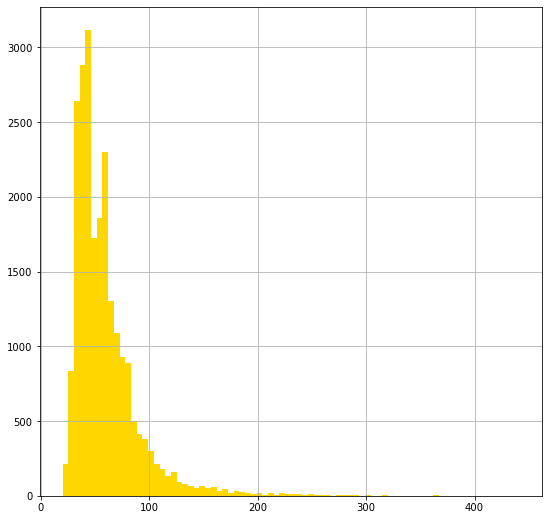

In [16]:
data.total_area.hist(bins = 80, figsize = (9,9),color = '#FFD700');

Большая часть квартир в отметке где-то 30-60 метров квадраных, что достаточно низко,если верить realty.rbc, то средняя площадь квартир в Москве 2020 годах , составляла 61 метр квадартаный, и только потом пошла на снижение, в следующих годах.

Изучить жилую площадь квартир .

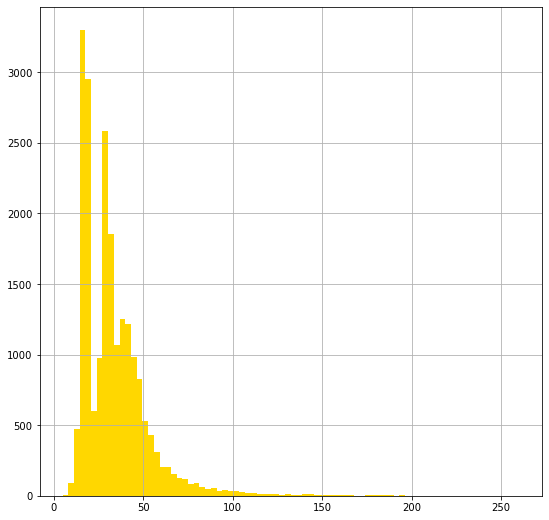

In [17]:
data.living_area.hist(bins = 80, figsize = (9,9), color = '#FFD700');

Явно прослеживается два пика, оба приходятся на отметку от 10 до 40, значит таких квартир было много. Достаточно низкий показатель,особенно если считать что пик , который самый "высокий", находится ближе к нулевой отметке.


Изучить кухни.

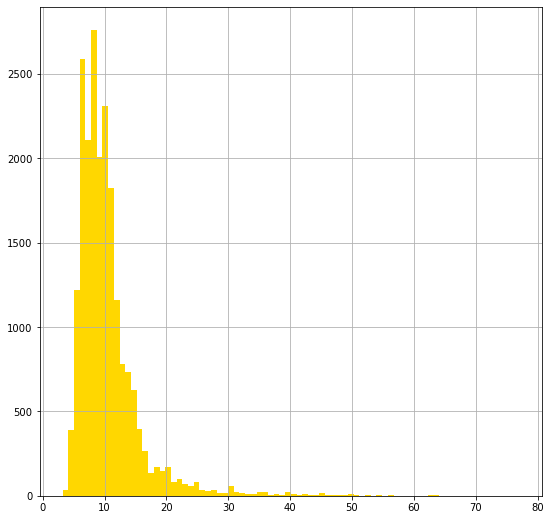

In [18]:
data.kitchen_area.hist(bins = 80,figsize = (9,9), color = '#FFD700');

Заметно, что подсчет кухонь максимальный на отмеке между 1-2 и 20, а так как он где то посередине, значит примерно 10 метров приходилось на каждую кухню.

Изучить стоимость квартиры.

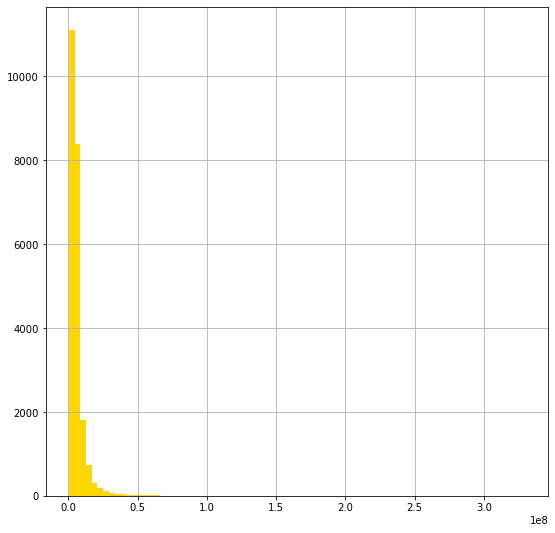

In [19]:
data.last_price.hist(bins = 80,figsize = (9,9),color = '#FFD700');

По гисторгамме заметно что квартиры стоят в большинстве случах одинаково . 

Изучить количество комнат.

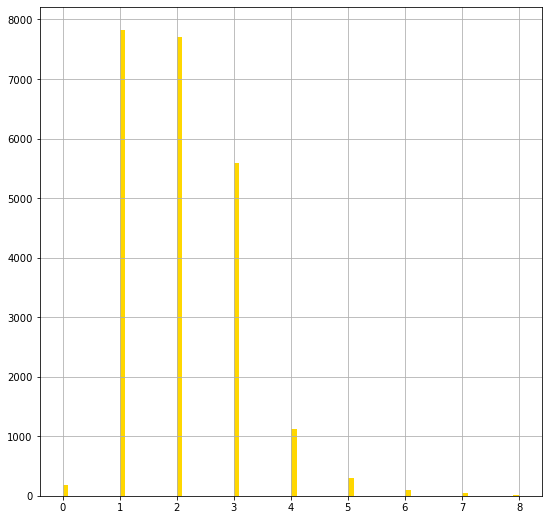

In [20]:
data.rooms.hist(bins = 80, figsize = (9,9),color = '#FFD700');

Больше всего комнат на отметке 1 и 2, меньше всего на отметке 7 и 8.

Изучить высоту потолков.

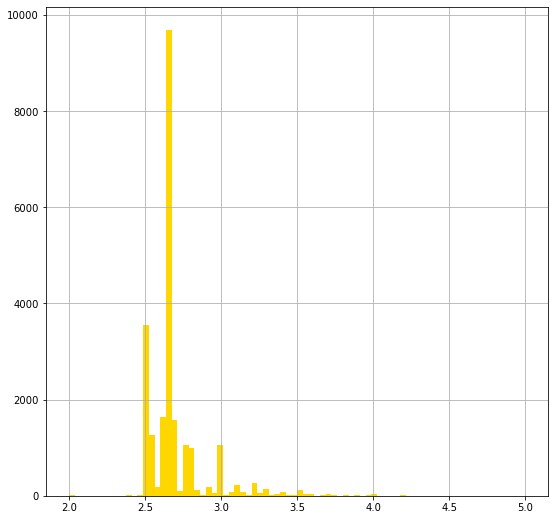

In [21]:
data.ceiling_height.hist(bins = 80, figsize = (9,9), color = '#FFD700');

Самым высоким показателем потолка является потолок с высотой примерно 2.6 , 2.7 метров. Наверное рязница в планировке зданий. По этим показателям, например, мы можем установить, что планировка зданий происходила , возможно, какой-то одной определенной компанией.

Изучить этаж.

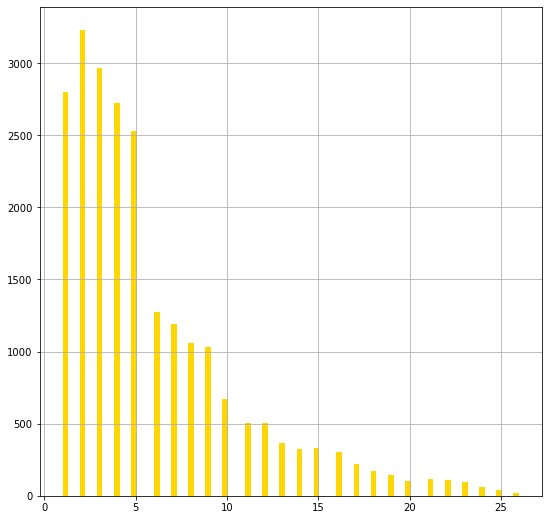

In [22]:
data.floor.hist(bins = 80, figsize = (9,9), color = '#FFD700');

Как видно по гисторгамме , популярностью пользуются этажи с 1 по 10, в особенности второй и третий...

Изучить тип этажа квартиры.

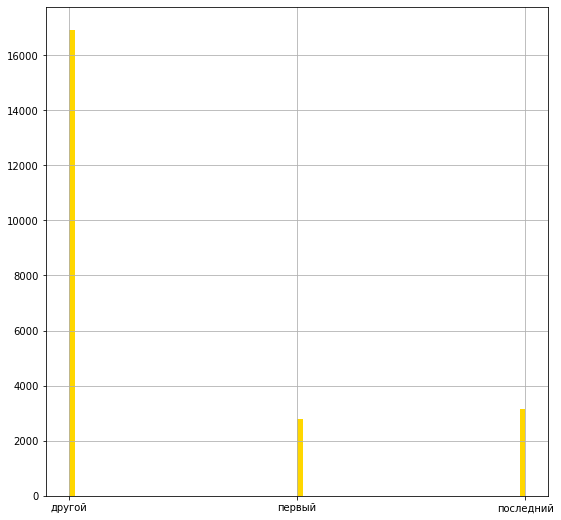

In [23]:
data.floor_category.hist(bins = 80, figsize = (9,9),color = '#FFD700');

Мы видим, что чаще всего выставляются объявления на "другой " тип этажа, но из "первых" и "последних", предпочтительнее 
"последние".

Изучить количество этажей.

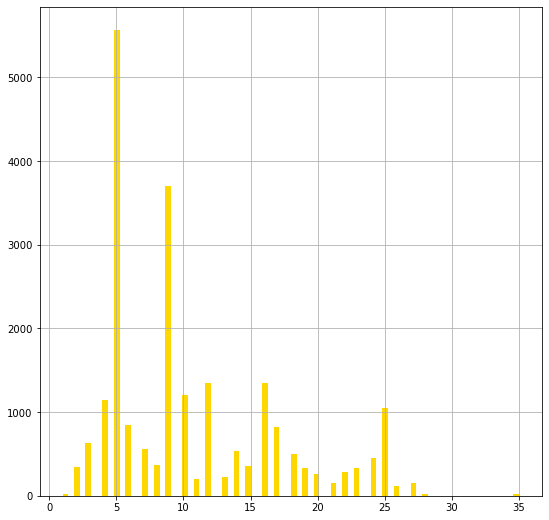

In [24]:
data.floors_total.hist(bins = 80, figsize = (9,9), color = '#FFD700');

Часто создают объявления на продажу квартир в пятиэтажных домах и девятиэтажных.  На гистограмме отчетливо 
видно, что также популярны - шестнадцатиэтажки и двадцатипятиэтажки, что может говорить о развитие инфрастуктуры города.

Изучим расстояние до центра города в метрах.

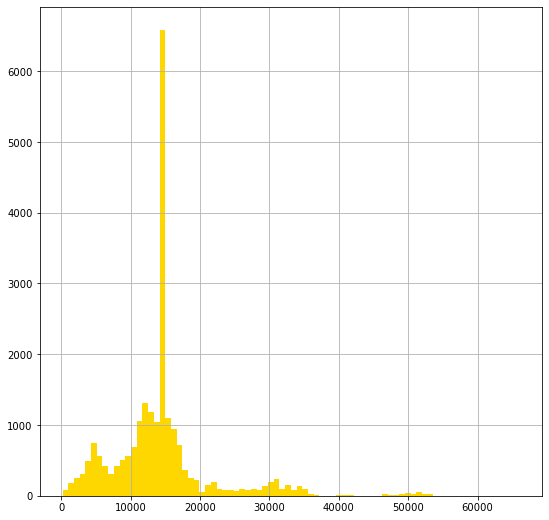

In [25]:
data.city_centers_nearest.hist(bins = 80, figsize = (9,9),color = '#FFD700');

У нас есть всего лишь один пик, и он говорит о том, что возможно в месте удаленности от города развивается какой-то новый район.

Изучить расстояние до близжайших аэропортов.

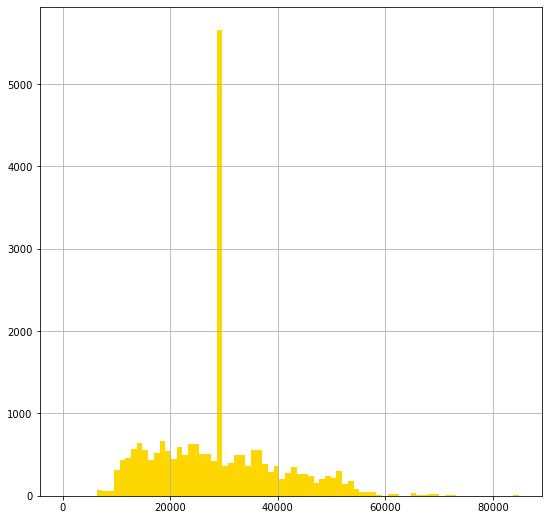

In [26]:
data.airports_nearest.hist(bins = 80,figsize = (9,9),color = '#FFD700');

Если верить данным википедии в Санкт -Петербурге находятся всего 3 аэропорта , это может означать, что какой то определенный район, достаточно далекий от центра, активно развивался в период продажи квартир за это время.  

Изучить расстояние до близжайших парков.

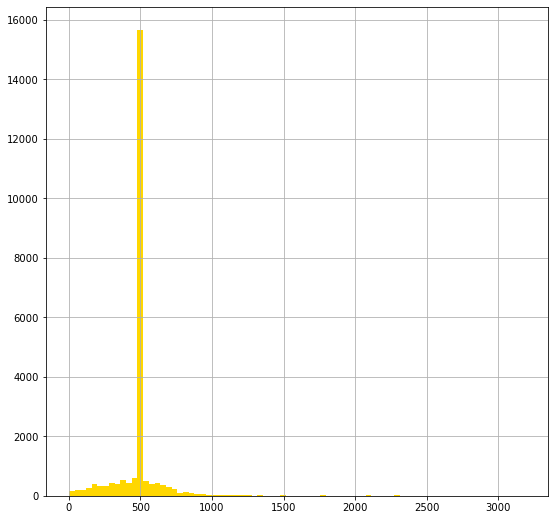

In [27]:
data.parks_nearest.hist(bins = 80,figsize = (9,9),color = '#FFD700');

Опять же есть какой-то определенный район, который можно отследить как точка продажи квартир, скорее всего именно он отвечает за отметку на графике  и можно установить что близжайший парк находится в 500 метрах от жилья.

Рассмотреть день и месяц побликации объявления.

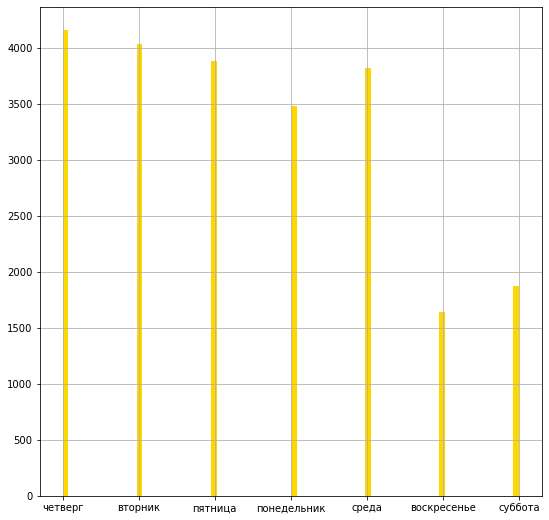

In [28]:
data.weekday_exposition.hist(bins = 80, figsize = (9,9), color = '#FFD700');

Публикации проияходят во все дни с небольшим спадом активности в выходные.

### Достроить гистограммы для других столбцов.

Достроить гистограммы для столбца total_images.

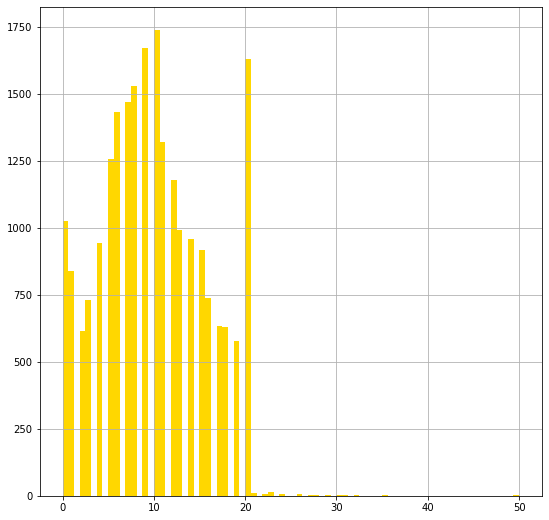

In [29]:
data.total_images.hist(bins = 80, figsize = (9,9), color = '#FFD700');

Мы можем сделать вывод что распределение фотграфий имеет нормальное распределение с двумя не "не нормальными" пиками  в 0 и 20 фотографий, 0 скорее всего нормальное количество а 20 рекомендуемое сайтом... 

Достроить гистограммы для столбца first_day_exposition.

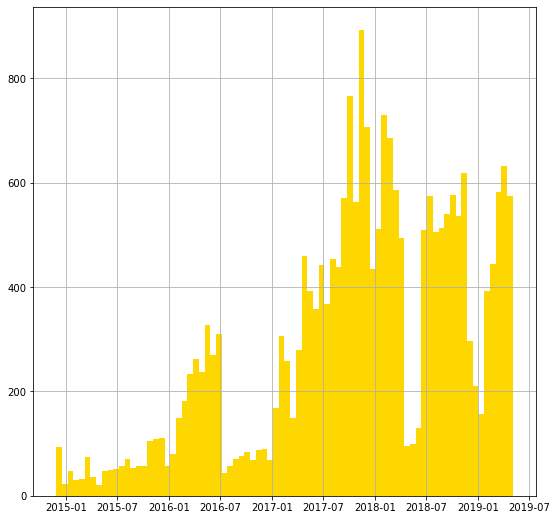

In [30]:
data.first_day_exposition.hist(bins = 80, figsize=(9,9), color = '#FFD700');

Больше всего публикаций в 2018 году.

Достроить гистограммы для столбца balcony.

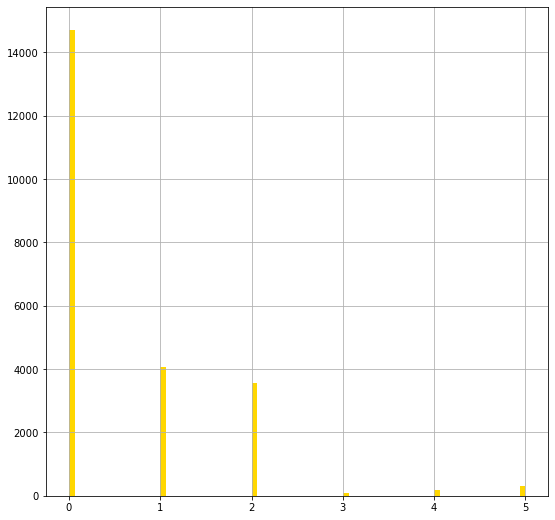

In [31]:
data.balcony.hist(bins = 80, figsize = (9,9), color = '#FFD700');

Балконов 0 , если предположить что чаще всего продавались квартиры в пятиэтажках, то такое вполне возможно...

Достроить гистограммы для столбца parks_around.

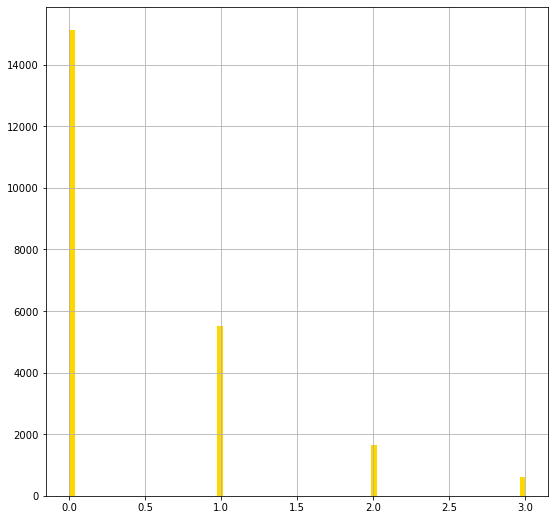

In [32]:
data.parks_around.hist(bins = 80, figsize = (9,9), color = '#FFD700');

Количество квартир с парками рядом не так уж и много.

Достроить гистограммы для столбца ponds_around.

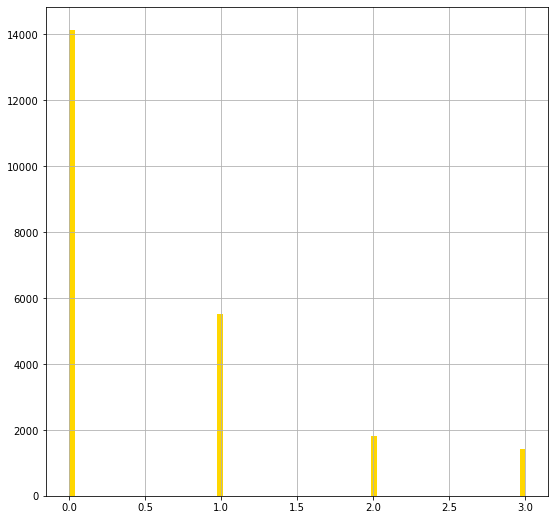

In [33]:
data.ponds_around.hist(bins = 80, figsize = (9,9),color = '#FFD700');

С прудами ситуация похожая, как и с парками.

Достроить гистограммы для столбца ponds_nearest.

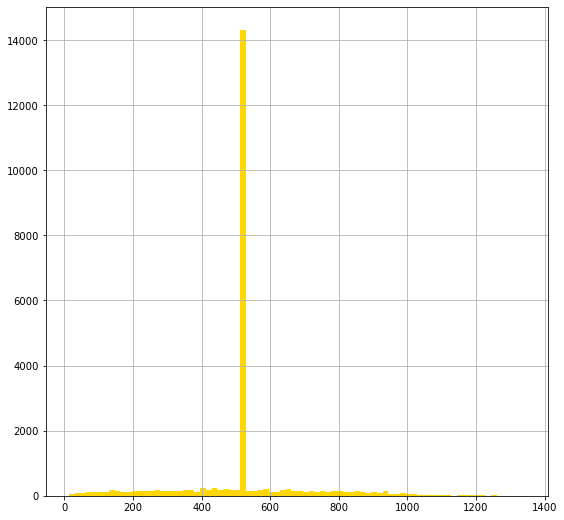

In [34]:
data.ponds_nearest.hist(bins = 80, figsize = (9,9), color = '#FFD700');

Расстояние от прудов примерно такое же, как расстояние от парков.

Достроить гистограммы для столбца price_per_square_meter.

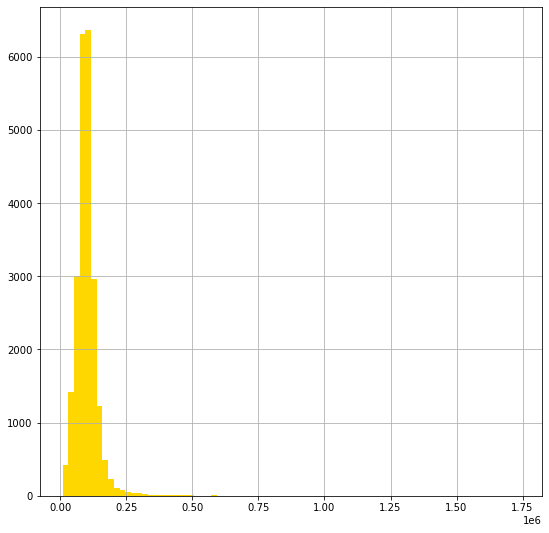

In [35]:
data.price_per_square_meter.hist(bins = 80, figsize = (9,9), color = '#FFD700');

Стоимость одного квадратного метра отражает картину, которую мы видели для стоимости самих квартир.

Изучить, как быстро или как долго продавались квартиры.

Среднее время продажи квартир равно: 161 
 Медианное время продажи квартир равно: 73


,days_exposition,number_of_apartments
71,72,3143
44,45,858
59,60,529
6,7,219
29,30,204
89,90,196
3,4,170
2,3,154
4,5,148
13,14,143


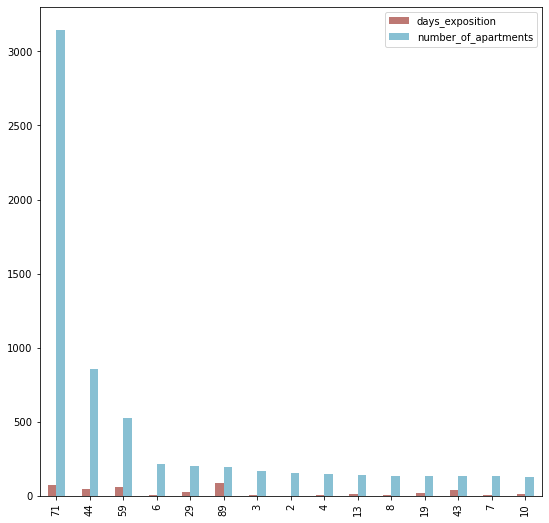

In [36]:
mean = data['days_exposition'].mean()
median = data['days_exposition'].median()
print('Среднее время продажи квартир равно:', int(mean),'\n', \
    'Медианное время продажи квартир равно:',int(median))
sorted_apartments = data[['days_exposition']]

sorted_apartments = sorted_apartments.assign(number_of_apartments=0)
sorted_apartments = sorted_apartments.groupby('days_exposition')['number_of_apartments'].\
count().reset_index().sort_values(by = 'number_of_apartments', ascending = False).head(15)
display(sorted_apartments)
sorted_apartments.plot(kind = 'bar',figsize = (9,9),color = ['#BD7873','#88C0D3']);

Среднее время продажи квартиры: 163 дня. Медианное время продажи квартиры: 73 дня. Самый частый показатель времени продажи квартиры :72 дня.Можно предположить, что на продажу квартиры обычно не уходит больше трех месяцев.

### Изучим факторы влияния на общую стоимость квартир.

Выяснить насколько фактор общей площади повлиял на стоимость квартир.

Корреляционная зависимость общей площади от последней цены равна: 0.68


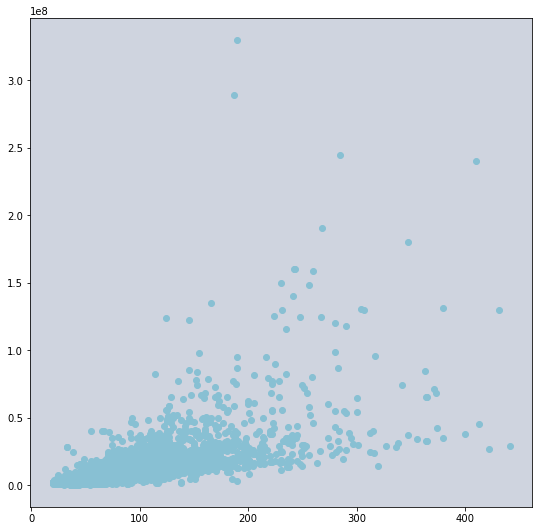

In [37]:
pivot_table_total_area = (
    data.pivot_table(index = 'total_area', values='last_price', aggfunc = 'count')
    
)
fig, ax = plt.subplots(figsize = (9,9))
plt.scatter(data['total_area'], data['last_price'], c='#88C0D3')
ax.set_facecolor('#CFD4DF')


print('Корреляционная зависимость общей площади от последней цены равна:',round(data['total_area'].\
      corr(data['last_price']), 2))

Выяснить насколько фактор жилой площади повлиял на стоимость квартир.

Корреляционная зависимость жилой площади от последней цены равна: 0.601


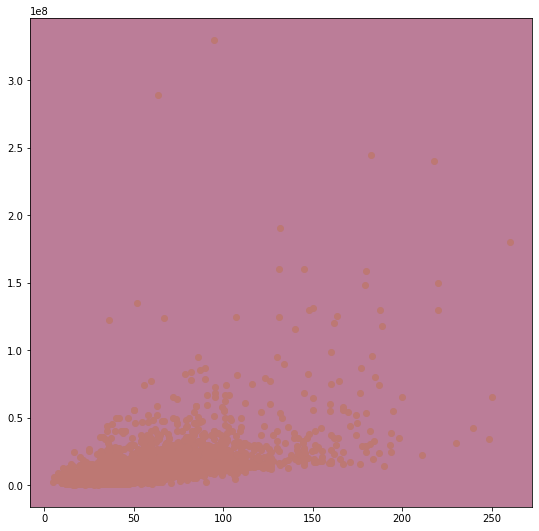

In [38]:
pivot_table_living_area = (
    data.pivot_table(index = 'living_area', values = 'last_price', aggfunc = 'count')
)



fig, ax = plt.subplots(figsize = (9,9))
plt.scatter(data['living_area'],data['last_price'],c = '#BD7873')
ax.set_facecolor('#BB7D98')


print('Корреляционная зависимость жилой площади от последней цены равна:',\
      round(data['living_area'].corr(data['last_price']),3))

Выяснить насколько фактор кухонной площади повлиял на стоимость квартир.

Корреляционная зависимость кухонной площади от последней цены равна: 0.515


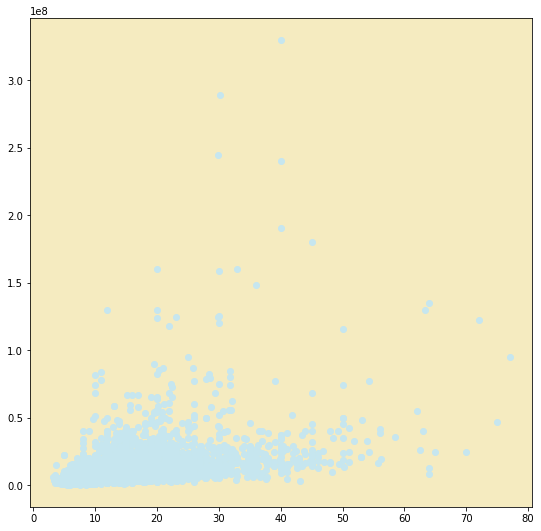

In [39]:
pivot_table_kitchen_area = (
    data.pivot_table(index = 'kitchen_area', values = 'last_price', aggfunc = 'count')
   
)
fig, ax = plt.subplots(figsize = (9,9))
plt.scatter(data['kitchen_area'],data['last_price'],c = '#C6E6EF')
ax.set_facecolor('#F5EBC0')



print('Корреляционная зависимость кухонной площади от последней цены равна:',\
     round(data['kitchen_area'].corr(data['last_price']),3))

Выяснить насколько фактор количества комнат повлиял на стоимость квартир.

Корреляционная зависимость количества комнат от последней цены равна: 0.399


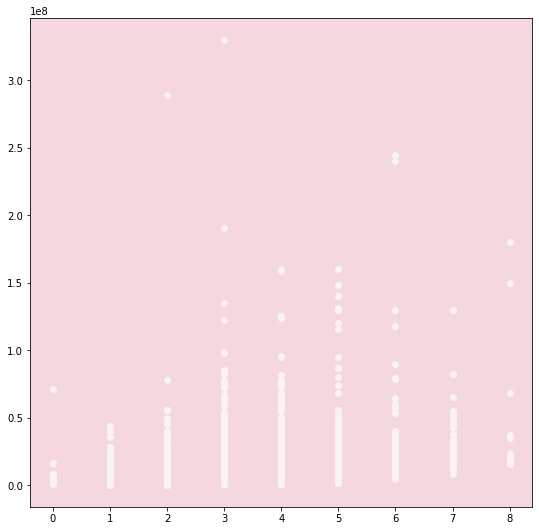

In [40]:
pivot_table_rooms = (
    data.pivot_table(index='rooms', values = 'last_price', aggfunc = 'count')
)
fig, ax = plt.subplots(figsize = (9,9))
plt.scatter(data.rooms,data.last_price,c = '#FAF2F3')
ax.set_facecolor('#F5D7DF')


print('Корреляционная зависимость количества комнат от последней цены равна:',
     round(data['rooms'].corr(data['last_price']),3))


Выяснить насколько фактор категории этажей повлиял на стоимость квартир.

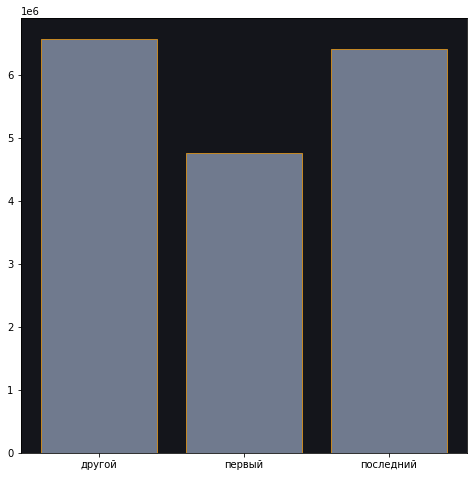

In [41]:
pivot_table_floor_category = (
    data.pivot_table(index = 'floor_category', values = 'last_price', aggfunc = 'mean')
    .reset_index()
)
fig, ax = plt.subplots(figsize=(8,8))
plt.bar(pivot_table_floor_category['floor_category'],pivot_table_floor_category['last_price'],edgecolor = '#D28F20',
       linewidth = 0.9,color ='#707A8E')
ax.set_facecolor('#14151B');

Средняя цена оказалась самой низкой для первых этажей,взаимосвязь есть.Первые этажи приобретают реже.

Узнать насколько фактор даты публикации повлиял на стоимость квартир.

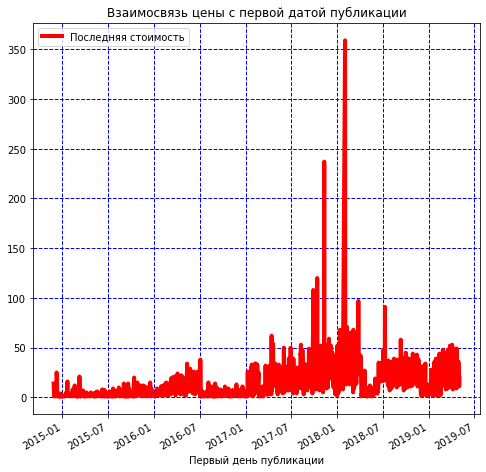

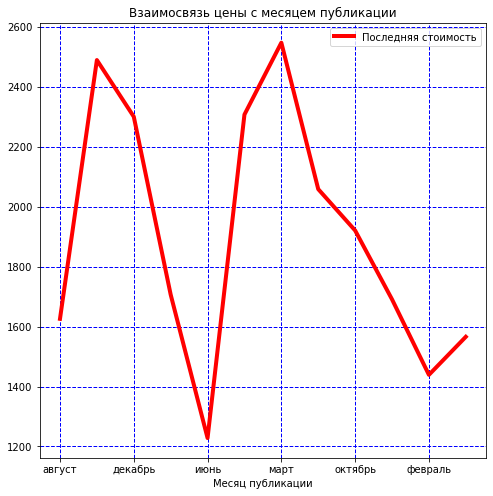

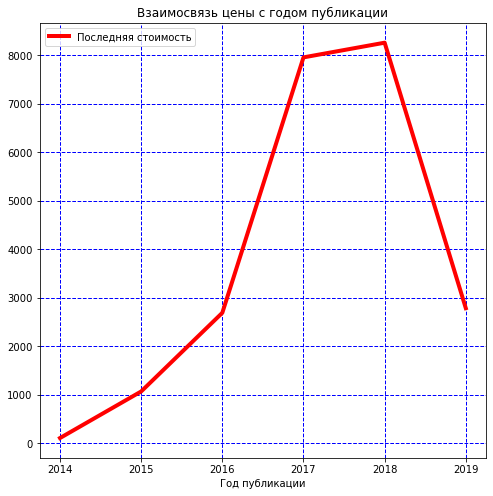

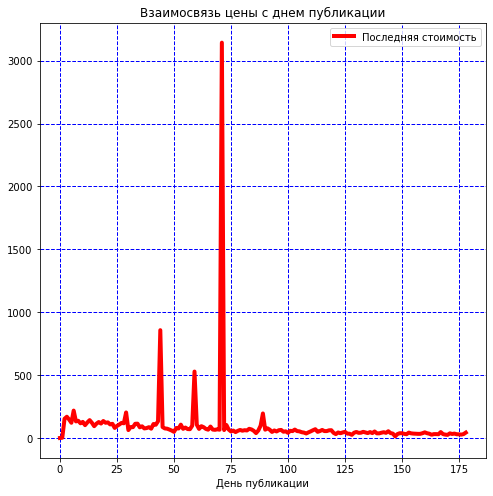

In [42]:
def grid(i):
    i.grid(color = 'blue',   
        linewidth = 1,  
        linestyle = '--')
   
    
pivot_table_first_day_exposition = (
    data.pivot_table(index='first_day_exposition', values='last_price', aggfunc = 'count')
    .plot(y='last_price', title='Взаимосвязь цены с первой датой публикации', figsize=(8, 8),\
          grid=True,color='r',linewidth = 4,\
          label='Последняя стоимость',xlabel = 'Первый день публикации')
)
grid(pivot_table_first_day_exposition)
    
pivot_table_month_exposition = (
    data.pivot_table(index='month_exposition', values='last_price', aggfunc = 'count')
    .plot(y='last_price', title='Взаимосвязь цены с месяцем публикации', figsize=(8, 8), \
          grid=True,color='r',linewidth = 4,label='Последняя стоимость',xlabel = 'Месяц публикации')
)
grid(pivot_table_month_exposition)  
pivot_table_year_exposition = (
    data.pivot_table(index='year_exposition', values='last_price', aggfunc = 'count')
    .plot(y='last_price', title='Взаимосвязь цены с годом публикации', figsize=(8, 8),\
          grid=True,color='r',linewidth = 4,label='Последняя стоимость',xlabel = 'Год публикации')
)
grid(pivot_table_year_exposition)
days_expositions = data.pivot_table(index='days_exposition', values='last_price', aggfunc = 'count').reset_index()

days_expositions = days_expositions.loc[days_expositions['days_exposition'] < 180]

days_expositions.plot(y='last_price', title='Взаимосвязь цены с днем публикации', \
                                 figsize=(8, 8), \
         grid=True,color='r',linewidth = 4,label='Последняя стоимость',xlabel = 'День публикации')\
        .grid(color = 'blue', linewidth = 1,  linestyle = '--')


Самой высокой стоимость квартир была в 2018 году. Падала стоимость в июне и феврале. Самая высокая стоимость была установлена на 74 дней публикации.

Выяснить среднюю стоимость квадратных метров у 10 населенных пунктов с самым высоким количеством объявлений. Визуализировать находку.

Самая низкая стоимость квадратного метра равна: 58625 
 Самая высокая стоимость квадратного метра равна: 114528


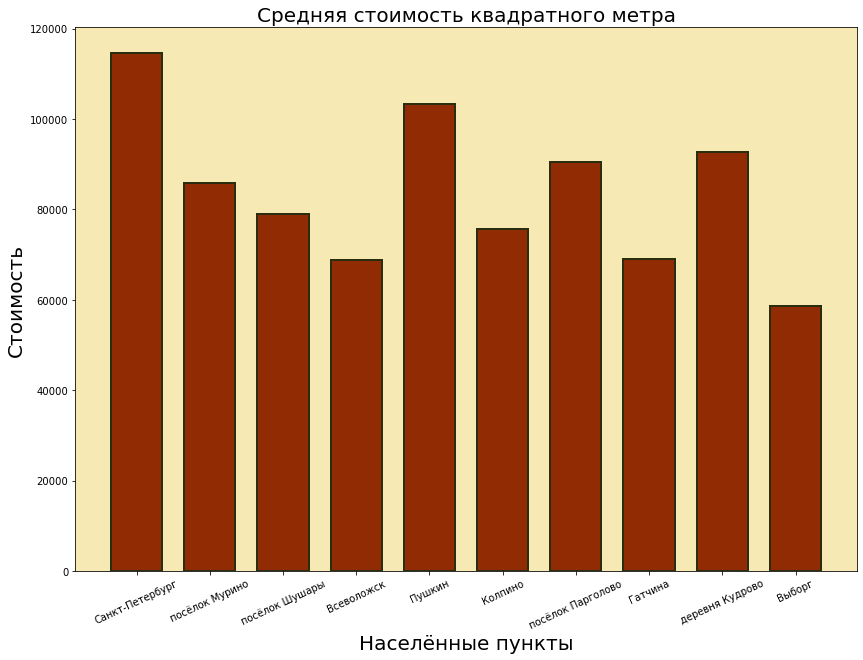

In [43]:
locality_m = data.pivot_table(index = 'locality_name',values = 'price_per_square_meter',\
                              aggfunc = ['mean','count'])
locality_m.columns = ['mean','count']
locality_m = locality_m.sort_values('count',ascending = False).head(10)
locality_m = locality_m.reset_index()

locality_min = data.pivot_table(index = 'locality_name',values = 'price_per_square_meter',\
                                aggfunc = ['mean','min'])
lmax = locality_m['mean'].max()

lmin = locality_m['mean'].min()
print('Самая низкая стоимость квадратного метра равна:' , round(lmin),'\n',\
      'Самая высокая стоимость квадратного метра равна:',round(lmax))




x = locality_m['locality_name']
y = locality_m['mean']

fig, ax = plt.subplots(figsize=(14,10))

plt.bar(x, y, width = 0.7, color = '#902B04', edgecolor = '#2B2E0E', 
        linewidth = 2)

plt.title('Средняя стоимость квадратного метра', fontsize = 20)
plt.xlabel('Населённые пункты', fontsize = 20)
plt.ylabel('Стоимость', fontsize = 20)
ax.set_facecolor('#F7E9B3')
plt.xticks(rotation = 25);

Выяснить среднюю стоимость квадратного километра в зависимости от отдаленного квартиры от центра города.

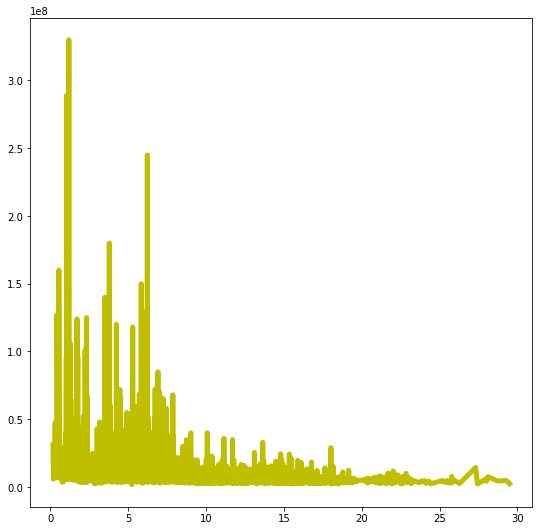

In [44]:
locality_km = (
 data.query('locality_name == "Санкт-Петербург"')
    .groupby('city_centers_nearest_km')['last_price'].mean() 
)
locality_km.columns = ['km', 'mean_price']

plt.figure(figsize = (9,9))


plt.plot(locality_km, linewidth = 5,color = 'y');

Стоимость достаточно высока там, где квартира расположена рядом с центром, что определяется наличием инфраструктуры города,
Так что, сэконмить можно, купив квартиру подальше от центра города, и корреляция в данном случае положительная:
чем дальше от центра города квартира, тем ниже ее стоимость.

 Изучить общую площадь квартир.

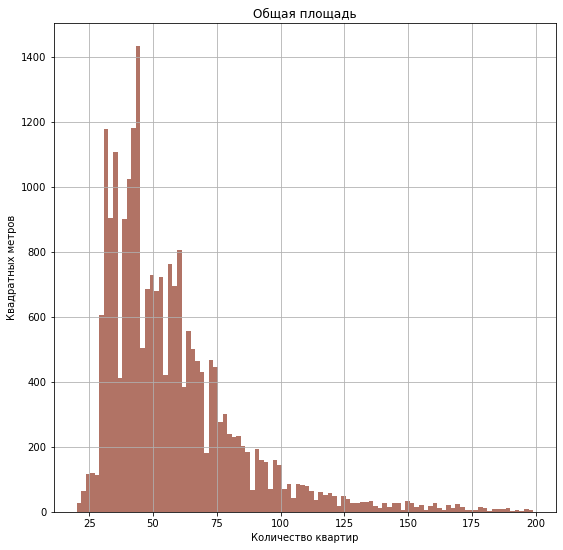

In [45]:
plt.figure(figsize = (9,9))

total_area_of_apartments = data.loc[data['total_area'] < 200]
total_area_of_apartments['total_area'].hist(bins = 100, color = '#B17365')
plt.title("Общая площадь")
plt.xlabel('Количество квартир')
plt.ylabel('Квадратных метров');

### Общий вывод

Больше всего пропусков было обнаружено в апартаментах, парках, прудах и балконах. В 13 из 22 полях были
обнаружены аномалии. Интересность к этим аномалиям заключается в том, что слишком большой разброс по значением.
Например, высота потолков 5 метров с одной стороны именьше 2 с другой стороны, или последняя стоимость от 12000 до
401300000 рублей. Такие аномалии могут быть связаны не только с системой, но еще и с мошенничеством.
Чтобы подобных аномалий стало меньше, возможно создать фильтр на обработку объявлений на квартиры, чтобы 
проверять достоверность предоставляемых данных. Чтобы было проще выследить личностей, которые могут быть мошенниками
, можно создать систему аутентификаации на сайте. 


Также аномалии могут быть связаны с тем, что не все квартиры
вовремя реализуются. Пропуски являются проблемой сбора информации, возможно стоит сделать обязательными поля, в которых слишком много пропусков,тогда проблема, возможно, будет  решена.



Самый частый показатель продажи квартир приходится на 72 день публикации, в то же время мы установили, что 
стоимость квартир больше всего повышается на 74 день публикации. Если даже предположим 90 процентов квартир
распродается за 73 дня, то 10 процентов остается и после и не факт что они будут проданы, поэтому немного
странно по моему мнению увеличивать стоимость таких квартир. Но с другой стороны с помощью этого примера
мы выяснили что стоимость связана с временем публикации. И возможно,стоит пытаться продать квартиру в перые 
2 месяца, наоборот занизив стоимость. Таким образом выиграв время. 


Тем более если считать что стоимость кавртир у нас распределяется равномерно. Но с другой стороны, если она равномерная, то какой шанс того, что если с самого начала понизить стоимость - квартиру купят? Именно поэтому очень важно понять, на основании чего выстраивается оптимальная
стоимость квартиры. Мы изучили данные где прослеживаются определенные тенденции, например, что квартиры в центре стоят 
дороже, или что люди чаще покупают однокомнатные квартиры и не обращают сильного внимания на наличие апартаментов
или балконов, эти тенденции не помогут определить оптимальную стоимость, но помогут понять, чем проданная квартира
отличается от "трехмесячной" и более квартиры. А уже благодаря этому пониманию можно будет заниматься подбором
квартир на перепродажу, основываясь на этих тенденциях, это будет самый оптимальный способ по моему мнению в 
этой конкретной ситуации по имеющимся данным. То есть факторами, которые влияют на стоимость квартир можно 
считать тенденции, которые подталкивают людей к покупке квартир в первые 73 дня.